<a href="https://colab.research.google.com/github/DRAGNIIR/AI-learning/blob/main/food_identify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import liberary
import os 
import numpy as np
from numpy import save
from keras.utils import to_categorical, load_img, img_to_array
from keras.models import Sequential,Model
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Activation, Dropout, LeakyReLU
from keras.optimizers import SGD
import matplotlib.pyplot as plt

# create a folder variable to contain photos
folder = '/content/drive/MyDrive/food'

photos, labels = list(), list()

for file in os.listdir(folder):
    output = None
    if file.startswith('banhbeo'):
   
        output = 0
      
    elif file.startswith('banhtrung'):
        output = 1
    elif file.startswith('bunrieu'):
        output = 2
    elif file.startswith('cakho'):
        output = 3
    elif file.startswith('catrungtuong'):
        output = 4
    elif file.startswith('chagio'):
        output = 5
    elif file.startswith('garan'):
        output = 6
    elif file.startswith('goicuon'):
        output = 7
    elif file.startswith('pho'):
        output = 8
    elif file.startswith('raumuong'):
        output = 9
#adding photos to a data set
    if output is not None:
       
        image = load_img(os.path.join(folder, file), target_size=(200,200,3))
        image = img_to_array(image) 
        
        photos.append(image)
        labels.append(output)

#redefine type for array
photos = np.array(photos) 
labels = np.array(labels)

#normalizing photos array
photos = photos.astype('float32')/255

# One-hot encode labels
labels = to_categorical(labels,10)

#shaping a model
model = Sequential()
model.add(Conv2D(64,(3,3), padding='same', input_shape=(200, 200,3)))
model.add(Activation('linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))


model.add(Conv2D(128,(3,3), padding = 'same'))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2), padding = 'same'))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(10, activation='softmax'))
model.summary()
#compile the model using sgd
sgd = SGD(lr = 0.001, decay = 1e-6, momentum = 0.9, nesterov= True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

history = model.fit(photos, labels, batch_size=128, epochs=40, verbose=1)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 200, 200, 64)      1792      
                                                                 
 activation_8 (Activation)   (None, 200, 200, 64)      0         
                                                                 
 leaky_re_lu_8 (LeakyReLU)   (None, 200, 200, 64)      0         
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 100, 100, 64)     0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 100, 100, 128)     73856     
                                                                 
 activation_9 (Activation)   (None, 100, 100, 128)     0         
                                                      

[0.08988764137029648, 0.10112359374761581, 0.10112359374761581, 0.21348313987255096, 0.15730337798595428, 0.16853933036327362, 0.2247191071510315, 0.2808988690376282, 0.37078651785850525, 0.49438202381134033, 0.5617977380752563, 0.6404494643211365, 0.584269642829895, 0.6404494643211365, 0.7078651785850525, 0.7191011309623718, 0.7752808928489685, 0.7415730357170105, 0.8089887499809265, 0.8089887499809265, 0.8651685118675232, 0.8426966071128845, 0.8764045238494873, 0.898876428604126, 0.8876404762268066, 0.8764045238494873, 0.932584285736084, 0.898876428604126, 0.898876428604126, 0.9101123809814453, 0.9550561904907227, 0.9438202381134033, 0.9775280952453613, 0.9438202381134033, 0.9438202381134033, 0.9550561904907227, 0.966292142868042, 0.966292142868042, 0.9775280952453613, 0.9775280952453613]
[2.3007278442382812, 2.2729880809783936, 2.2492105960845947, 2.218017101287842, 2.221752643585205, 2.1781857013702393, 2.169650077819824, 2.1180081367492676, 2.0839176177978516, 2.054938316345215, 2

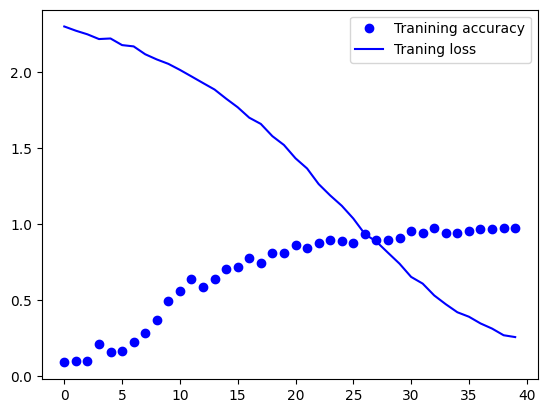

3/3 [==============================] - 4s 1s/step - loss: 0.2422 - accuracy: 0.9775
Test loss: 0.24217243492603302
Test accuracy: 0.9775280952453613


In [ ]:
#evaluate the accuracy of the trained model
accuracy=history.history['accuracy']
loss=history.history['loss']
print(accuracy)
print(loss)
#ploting the graph using mathplot
plt.plot(accuracy,'bo',label='Tranining accuracy')
plt.plot(loss,'b',label='Traning loss')
plt.legend()
plt.show()
# test losses and accuracy
score = model.evaluate(photos, labels, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

#save the pretrained model
model.save('food_identify.h5')


1/1 [==============================] - 0s 106ms/step
[[0.02362066 0.04465191 0.0008979  0.06140237 0.323232   0.01454081
  0.00197698 0.01548881 0.00905672 0.5051318 ]]


'Rau_muong_xao'

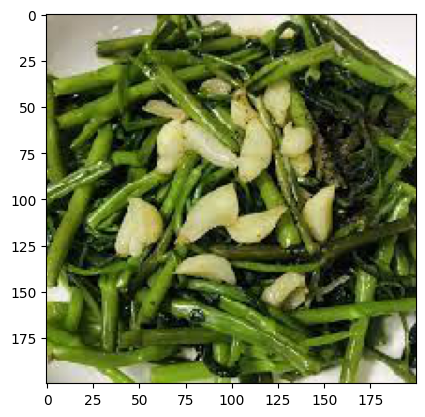

In [ ]:
#create classification for food group
classes= ['Banh_beo','Banh_chung','Bun_rieu','Ca_kho','Ca_trung_tuong','Cha_gio','ga_ran','Goi_cuon','Pho','Rau_muong_xao']
#loading image and reshape
img= load_img('/content/drive/MyDrive/food/raumuong1.jpg', target_size=(200,200,3))

plt.imshow(img)
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,200,200,3)  
imgRe = imgRe.astype('float32')/255
#predict the image
y_pred = model.predict(imgRe)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]] 